In [1]:
import pandas as pd

import numpy as np

from sklearn import linear_model

In [2]:
dtype_dict = {
    'bathrooms': float,
    'bedrooms': float,
    'condition': int,
    'date': str,
    'floors': float,
    'grade': int,
    'id': str,
    'lat': float,
    'long': float,
    'price': float,
    'sqft_above': int,
    'sqft_basement': int,
    'sqft_living': float,
    'sqft_living15': float,
    'sqft_lot': int,
    'sqft_lot15': float,
    'view': int,
    'waterfront': int,
    'yr_built': int,
    'yr_renovated': int,
    'zipcode': str
}

In [3]:
def get_numpy_data(data, features, output):
    data['constant'] = 1 
    return (np.array(data[['constant'] + features]), np.array(data[output]))

In [4]:
def predict_outcome(features, weights):
    '''
    features   N * f
    weights    f * 1
    '''
    return np.dot(features, weights)

In [20]:
def compute_rss(predictions, real):
    errors = real - predictions
    rss = sum(errors * errors)
    return rss

In [5]:
kc_house_test_data = pd.read_csv('kc_house_test_data.csv', dtype = dtype_dict)

kc_house_train_data = pd.read_csv('kc_house_train_data.csv', dtype = dtype_dict)

In [6]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant:
        return 2 * np.dot(errors, feature)
    else:
        return 2 * np.dot(errors, feature) + 2 * l2_penalty * weight

In [7]:
sales = kc_house_train_data.sort_values(['sqft_living', 'price'])

(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_outcome(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(np.sum(errors * example_features[:,1]) * 2 + 20.)

# next two lines should print the same values
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors) * 2.)

-4.55328923355e+13
-4.55328923355e+13
-18029479492.0
-18029479492.0


In [8]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights)

    for _ in range(max_iterations):
        errors = predict_outcome(feature_matrix, weights) - output
        for i in range(len(weights)):
            weights[i] = weights[i] - step_size * feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, i == 0)

    return weights

In [9]:
simple_features = ['sqft_living']
my_output = 'price'

(simple_feature_matrix, output) = get_numpy_data(kc_house_train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(kc_house_test_data, simple_features, my_output)

In [10]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(len(simple_feature_matrix[0]))

In [11]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)

In [12]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)

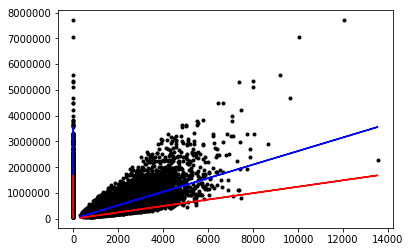

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix, output, 'k.',
         simple_feature_matrix, predict_outcome(simple_feature_matrix, simple_weights_0_penalty),'b-',
         simple_feature_matrix, predict_outcome(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [14]:
print(simple_weights_0_penalty)
print(simple_weights_high_penalty)

[ -1.63113515e-01   2.63024369e+02]
[   9.76730382  124.57217567]


In [17]:
print('%.2e' % compute_rss(predict_outcome(simple_test_feature_matrix, np.array(initial_weights)), test_output))

1.78e+15


In [30]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'

(multiple_feature_matrix, output) = get_numpy_data(kc_house_train_data, model_features, my_output)
(multiple_test_feature_matrix, test_output) = get_numpy_data(kc_house_test_data, model_features, my_output)

step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(len(multiple_feature_matrix[0]))

In [31]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(multiple_feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)
multiple_weights_high_penalty = ridge_regression_gradient_descent(multiple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)

In [32]:
print(multiple_weights_0_penalty)
print(multiple_weights_high_penalty)

[  -0.35743483  243.05416982   22.41481497]
[  6.74296579  91.48927365  78.43658766]


In [33]:
print('%.2e' % compute_rss(predict_outcome(multiple_test_feature_matrix, np.array(initial_weights)), test_output))

1.78e+15


In [36]:
predict_outcome(multiple_test_feature_matrix[0], multiple_weights_0_penalty) - test_output[0]

77465.476058235334

In [37]:
predict_outcome(multiple_test_feature_matrix[0], multiple_weights_high_penalty) - test_output[0]

-39546.469678059453